# Simple Linear Regression

When discussing Linear Regression, two questions arise frequently:

**Question 1:** How do I use my simple linear regression model to make a single prediction, for example, to predict the salary of an employee with 12 years of experience?

**Question 2:** How do I get the final regression equation $y = b_0 + b_1 * x_1$ with the final values of the coefficients $b_0$ and $b_1$?

## Dataset

### Layout

* Columns: 2
	* Employee years of experience
	* Employee salary
* Rows: 30 observations
	* Each row represents one employee
		* Feature:
			* Years of experience
		* Dependent variable:
			* Salary

### Background

* Company gathered data on their employees

### Goals

* Build a simple linear regression model that is trained to understand the correlations between number of years of experience and salary so it can predict salary for a new employee based on number of years of prior experience what that employee's salary should be

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [3]:
print(*X[:25], sep='\n')

[1.1]
[1.3]
[1.5]
[2.]
[2.2]
[2.9]
[3.]
[3.2]
[3.2]
[3.7]
[3.9]
[4.]
[4.]
[4.1]
[4.5]
[4.9]
[5.1]
[5.3]
[5.9]
[6.]
[6.8]
[7.1]
[7.9]
[8.2]
[8.7]


In [4]:
print(*y[:25], sep='\n')

39343.0
46205.0
37731.0
43525.0
39891.0
56642.0
60150.0
54445.0
64445.0
57189.0
63218.0
55794.0
56957.0
57081.0
61111.0
67938.0
66029.0
83088.0
81363.0
93940.0
91738.0
98273.0
101302.0
113812.0
109431.0


## Split Dataset into Training Set and Test Set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Train Simple Linear Regression Model on Training Set

* `LinearRegression` is the class used to train linear regression models
* `fit` method is used to train the model on the training set
* `fit` method is used for all types of models:
    * Regression
    * Classification
    * Neural networks

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predict Test Set results

* Values in the column for the dependent variable in the test set (`y_test`) are the actual values and are known as the 'ground truth'
* `predict` method returns a vector of predicted values (1-dimensional array)
* `y_pred` variable is the vector containing the predicted values

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
print(y_pred.reshape(len(y_pred), 1))

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]


## Visualize Training Set Results

* Creates a scatter chart of the training set results
* Plot the best simple linear regression line
* Data points on the line corresponding to the predicted salaries will follow a straight line (linear function)
* One is visualizing the training set so x-coordinates need to be from `X_train`
* One has not yet created a vector of the predicted values of the training set so use the `predict` method to create the vector
* Add titles and labels to the scatter chart

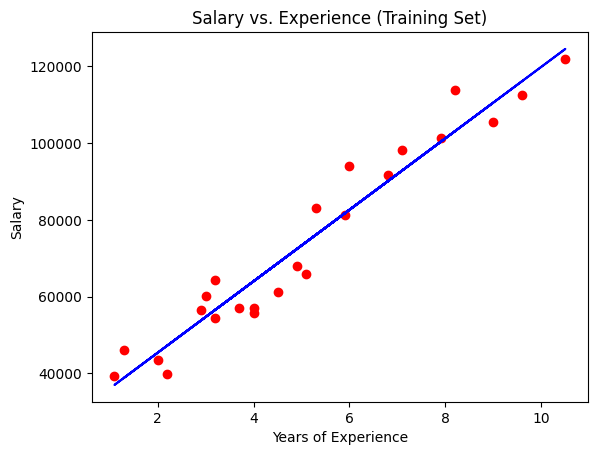

In [9]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs. Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualize Test Set Results

* The same regression line will be plotted regardless if the training or test set is applied

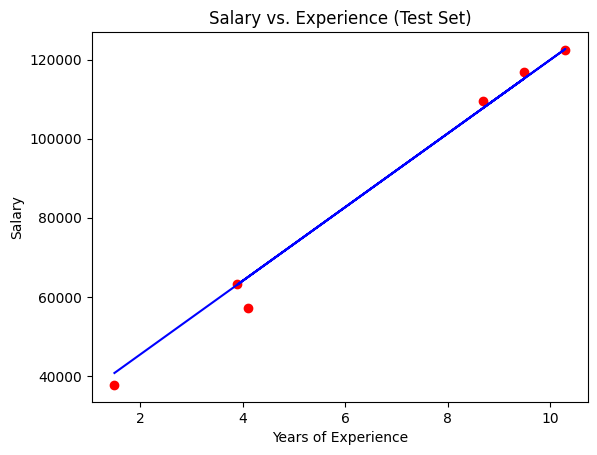

In [10]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs. Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Make Single Prediction

### Example: The salary of an employee with 12 years of experience

In [11]:
print(regressor.predict([[12]]))

[138531.00067138]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138,531.00.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the `predict` method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

## Get Final Linear Regression Equation with values of Coefficients

In [12]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9312.57 \times \textrm{Years Experience} + 26780.09$$

**Important Note:** To get these coefficients we called the `coef_` and `intercept_` attributes from our regressor object. Attributes in Python are different from methods and usually return a simple value or an array of values.